In [ ]:
# exit()

# Data n Library Setup

In [ ]:
# Packages Library

import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
warnings.filterwarnings('ignore')
from datetime import datetime as dt
import regex as re

In [ ]:
# Plot Setup

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Table Display Setup: Show All Columns

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/Clicked Ads Dataset.csv')

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Features Engineering

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df['Weekday'] = df['Timestamp'].dt.dayofweek

In [ ]:
time_buckets = {
    '1': '00:00 - 06:00',
    '2': '06:00 - 12:00',
    '3': '12:00 - 18:00',
    '4': '18:00 - 24:00'
}

In [ ]:
# time bucket

df['TimeBucket'] = pd.cut(df['Timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['1', '2', '3', '4'], right=False, include_lowest=True)

In [ ]:
time_buckets

{'1': '00:00 - 06:00',
 '2': '06:00 - 12:00',
 '3': '12:00 - 18:00',
 '4': '18:00 - 24:00'}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  987 non-null    float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               987 non-null    float64       
 4   Daily Internet Usage      989 non-null    float64       
 5   Male                      997 non-null    object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  Weekday                   1000 non-null   int32         
 12  TimeBucket           

## Features Grouping

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
binary_cols = []

for col in df.columns:
  if df[col].nunique() == 2:
    binary_cols.append(col)

time_cols = ['Timestamp']

num_type = ['int64', 'float64', 'int32']
num_cols = []

for col in df.columns:
  if df[col].dtype in num_type:
    num_cols.append(col)

cat_cols = []

for col in df.columns:
  if col not in binary_cols + time_cols + num_cols:
    cat_cols.append(col)

In [ ]:
print(f'Binary Columns: {binary_cols}')
print(f'Time Columns: {time_cols}')
print(f'Numerical Columns: {num_cols}')
print(f'Categorical Columns: {cat_cols}')

Binary Columns: ['Male', 'Clicked on Ad']
Time Columns: ['Timestamp']
Numerical Columns: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Weekday']
Categorical Columns: ['city', 'province', 'category', 'TimeBucket']


## Insights Findings

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Male                      997 non-null    object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
 10  Weekday                   1000 non-null   int32         
 11  TimeBucket                1000 non-null   category      
dtypes: category(1), datet

### Weekday

In [ ]:
weekday = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [ ]:
df_weekday = df[['Weekday', 'Clicked on Ad']].copy()
df_weekday['Weekday'] = df_weekday['Weekday'].map(weekday)

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday['Weekday'] = pd.Categorical(df_weekday['Weekday'], categories=day_order, ordered=True)

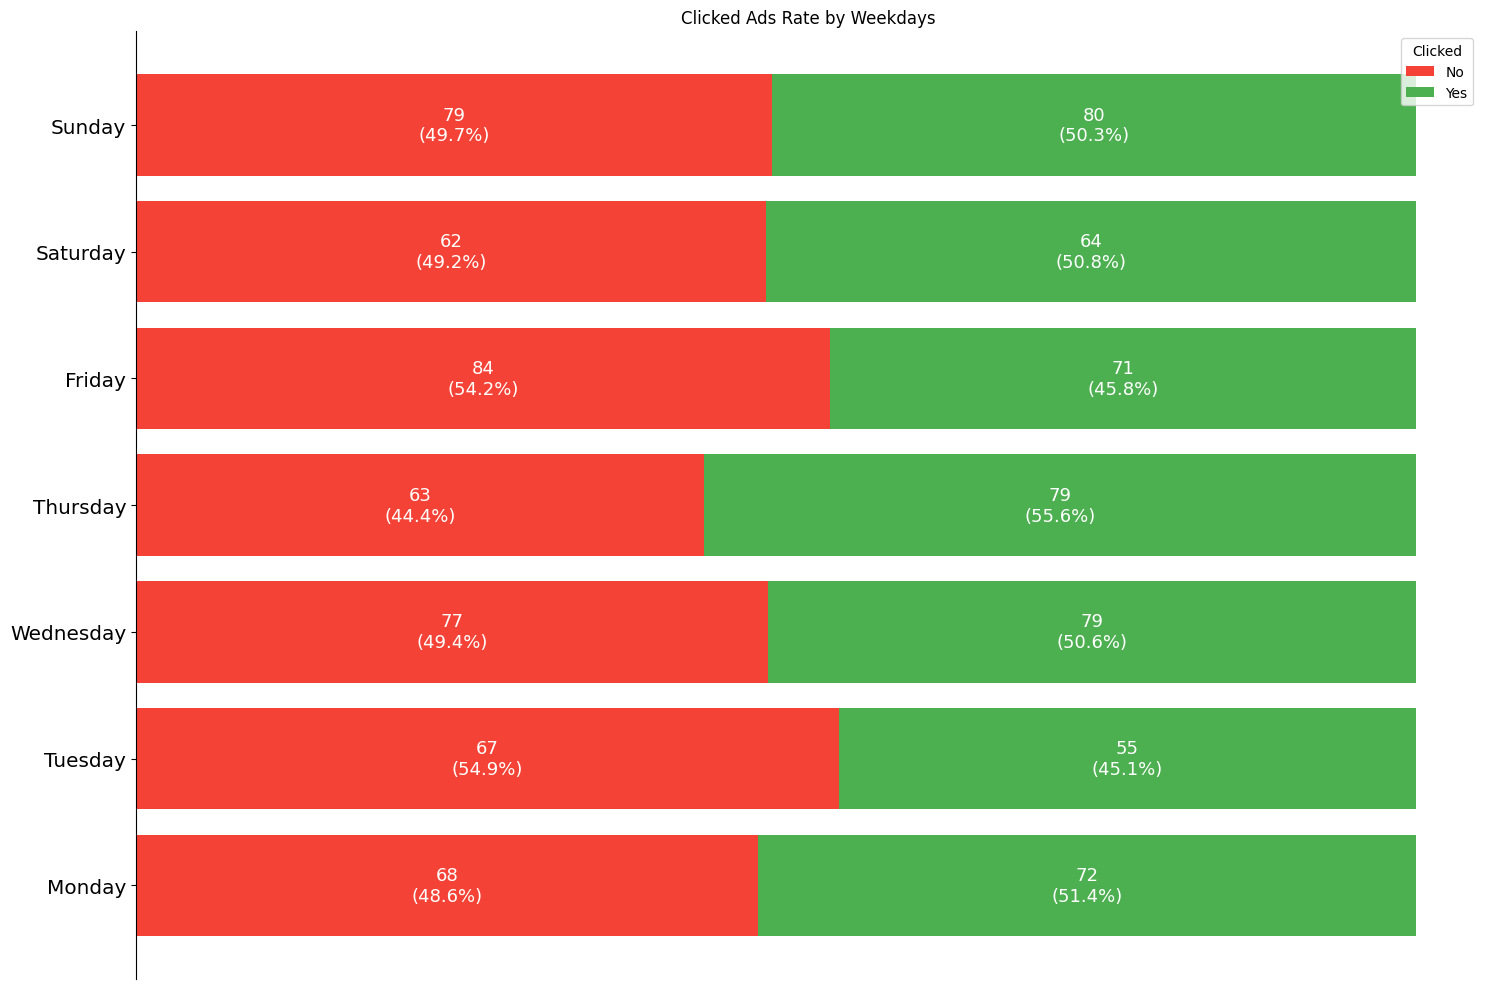

In [ ]:
# countplot
# sns.countplot(data=df, x='AgeGroup', hue='Response')
ct = pd.crosstab(df_weekday['Weekday'], df_weekday['Clicked on Ad'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,10))
lefts = [0] * len(ct)
colors = ['#F44336', '#4CAF50']

for i, col in enumerate(ct.columns):
	bars = ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
	for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
		if v > 0:
			ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
	lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Clicked Ads Rate by Weekdays')
ax.legend(title='Clicked', loc='upper right')
plt.xticks(visible=False)
plt.xlabel('')
# no spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

In [ ]:
df_monday = df[df['Weekday'] == 0]
df_tuesday = df[df['Weekday'] == 1]
df_wednesday = df[df['Weekday'] == 2]
df_thursday = df[df['Weekday'] == 3]
df_friday = df[df['Weekday'] == 4]
df_saturday = df[df['Weekday'] == 5]
df_sunday = df[df['Weekday'] == 6]

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'Weekday', 'TimeBucket'],
      dtype='object')

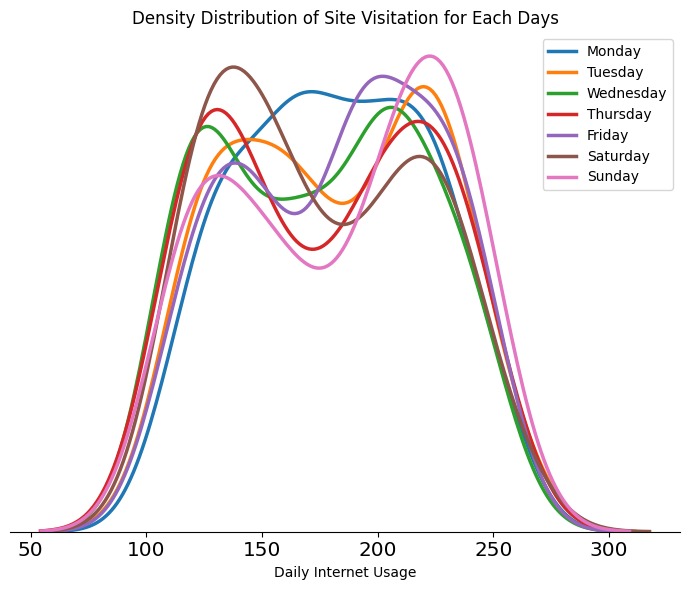

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(df_monday['Daily Internet Usage'],label='Monday')
sns.kdeplot(df_tuesday['Daily Internet Usage'], label='Tuesday')
sns.kdeplot(df_wednesday['Daily Internet Usage'], label='Wednesday')
sns.kdeplot(df_thursday['Daily Internet Usage'], label='Thursday')
sns.kdeplot(df_friday['Daily Internet Usage'], label='Friday')
sns.kdeplot(df_saturday['Daily Internet Usage'], label='Saturday')
sns.kdeplot(df_sunday['Daily Internet Usage'], label='Sunday')

plt.title('Density Distribution of Site Visitation for Each Days')
plt.legend()
plt.yticks(visible=False)
plt.ylabel('')
# no spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.tight_layout()
plt.show()

### Time Bucket

In [ ]:
time_buckets

{'1': '00:00 - 06:00',
 '2': '06:00 - 12:00',
 '3': '12:00 - 18:00',
 '4': '18:00 - 24:00'}

In [ ]:
df_time = df[['TimeBucket', 'Clicked on Ad']].copy()
df_time['TimeBucket'] = df_time['TimeBucket'].map(time_buckets)

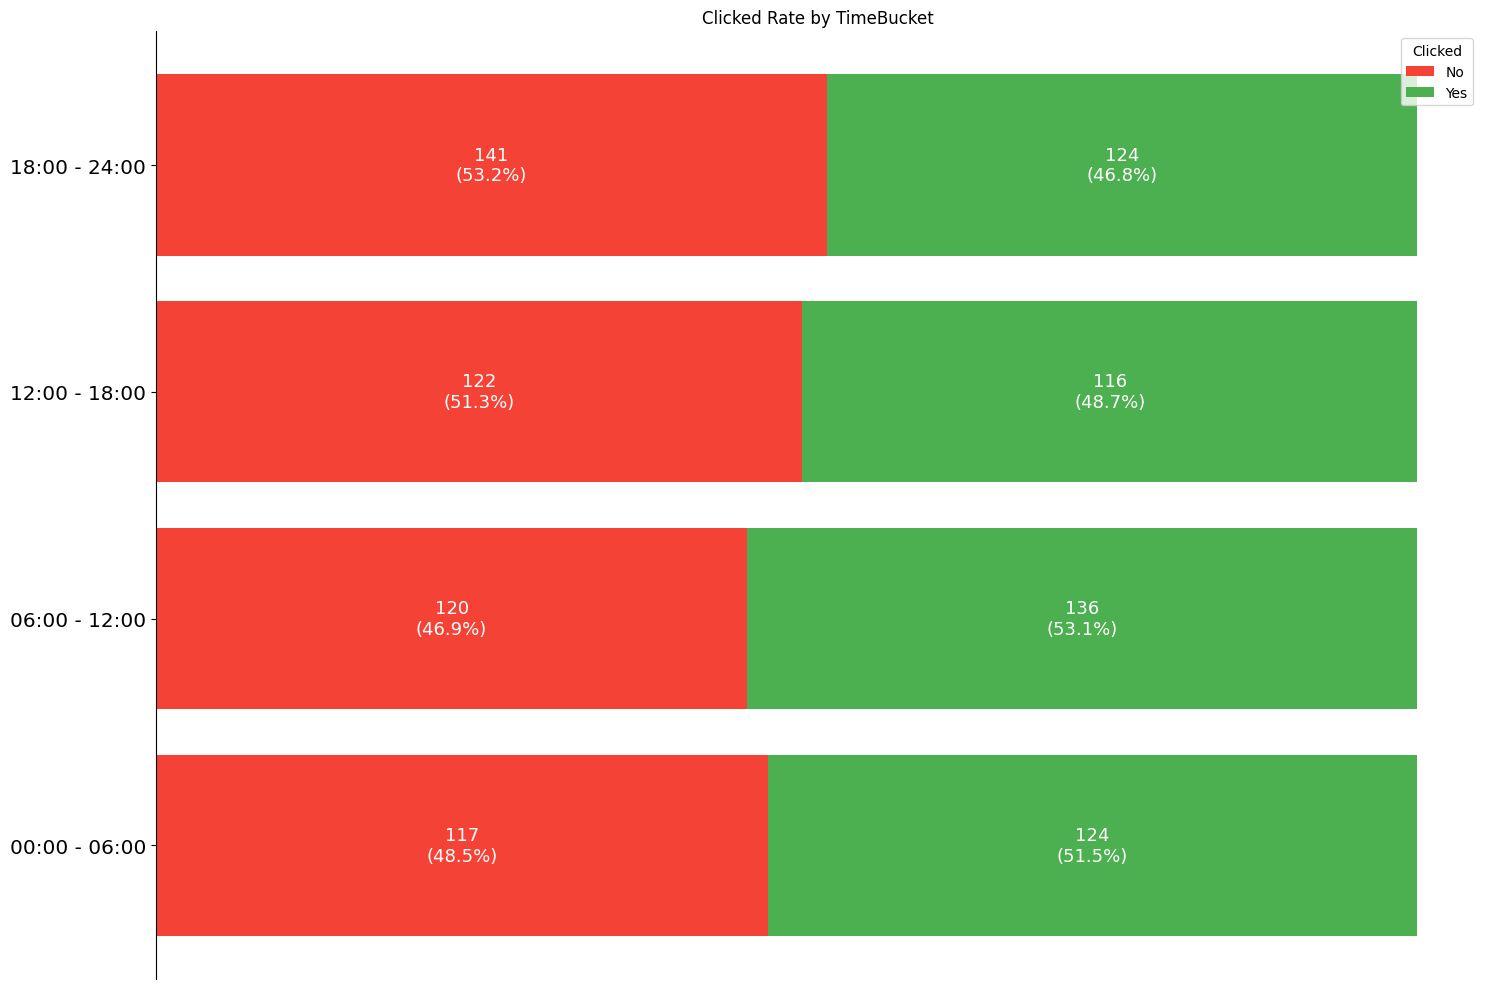

In [ ]:
# countplot
# sns.countplot(data=df, x='AgeGroup', hue='Response')
ct = pd.crosstab(df_time['TimeBucket'], df_time['Clicked on Ad'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,10))
lefts = [0] * len(ct)
colors = ['#F44336', '#4CAF50']

for i, col in enumerate(ct.columns):
	bars = ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
	for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
		if v > 0:
			ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
	lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Clicked Rate by TimeBucket')
ax.legend(title='Clicked', loc='upper right')
plt.xticks(visible=False)
plt.xlabel('')
# no spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

In [ ]:
time_buckets

{'1': '00:00 - 06:00',
 '2': '06:00 - 12:00',
 '3': '12:00 - 18:00',
 '4': '18:00 - 24:00'}

In [ ]:
df_midnight = df[df['TimeBucket'] == '1']
df_morning = df[df['TimeBucket'] == '2']
df_afternoon = df[df['TimeBucket'] == '3']
df_evening = df[df['TimeBucket'] == '4']

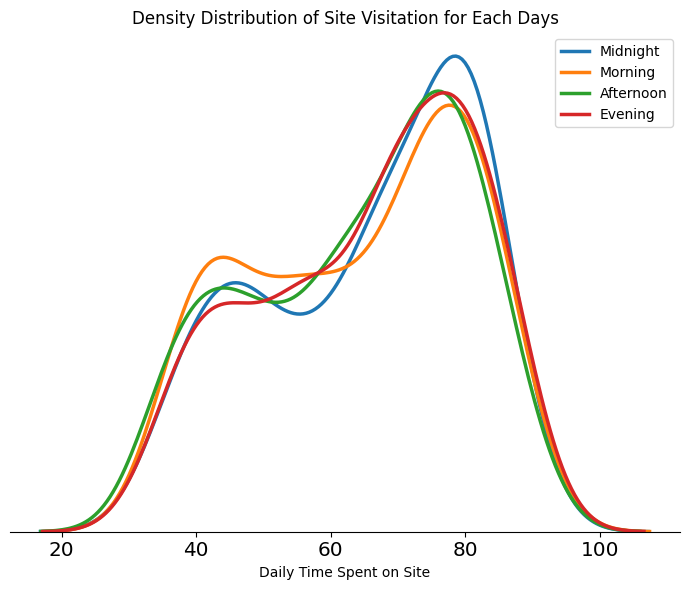

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(df_midnight['Daily Time Spent on Site'],label='Midnight')
sns.kdeplot(df_morning['Daily Time Spent on Site'], label='Morning')
sns.kdeplot(df_afternoon['Daily Time Spent on Site'], label='Afternoon')
sns.kdeplot(df_evening['Daily Time Spent on Site'], label='Evening')

plt.title('Density Distribution of Site Visitation for Each Days')
plt.legend()
plt.yticks(visible=False)
plt.ylabel('')
# no spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.tight_layout()
plt.show()

### Category

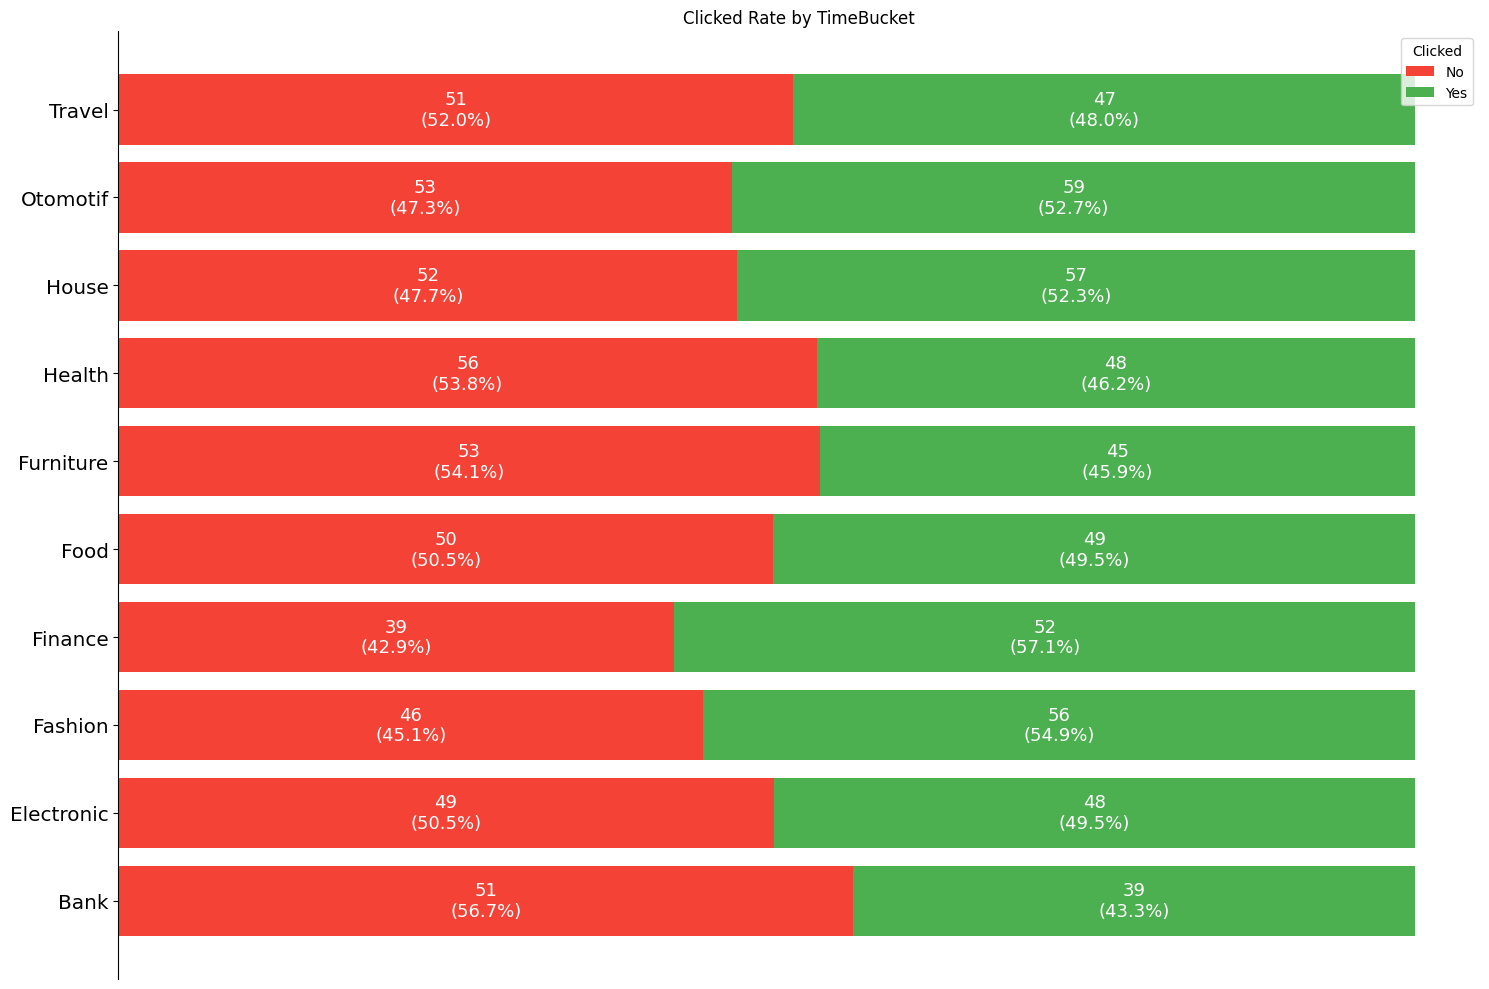

In [ ]:
# countplot
# sns.countplot(data=df, x='AgeGroup', hue='Response')
ct = pd.crosstab(df['category'], df['Clicked on Ad'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,10))
lefts = [0] * len(ct)
colors = ['#F44336', '#4CAF50']

for i, col in enumerate(ct.columns):
	bars = ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
	for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
		if v > 0:
			ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
	lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Clicked Rate by TimeBucket')
ax.legend(title='Clicked', loc='upper right')
plt.xticks(visible=False)
plt.xlabel('')
# no spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

### Clicked vs Not Clicked

In [ ]:
df_clicked = df[df['Clicked on Ad'] == 'Yes']
df_not_clicked = df[df['Clicked on Ad'] == 'No']

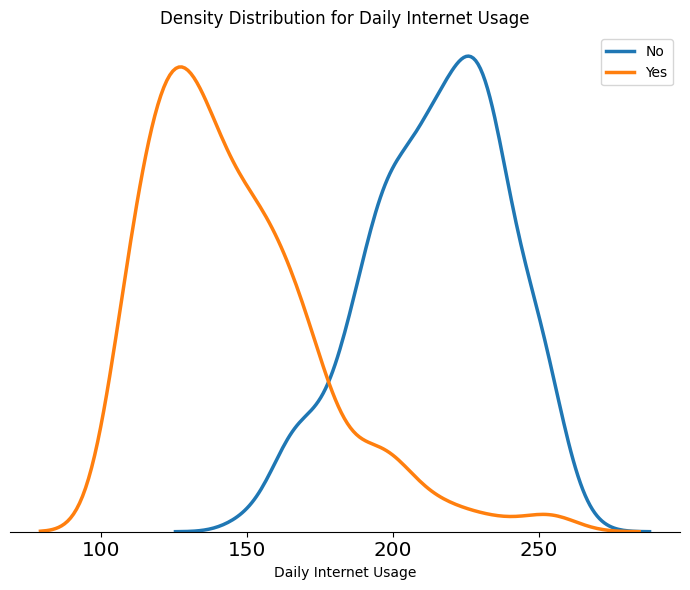

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(df_not_clicked['Daily Internet Usage'],label='No')
sns.kdeplot(df_clicked['Daily Internet Usage'],label='Yes')

plt.title('Density Distribution for Daily Internet Usage')
plt.legend()
plt.yticks(visible=False)
plt.ylabel('')
# no spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.tight_layout()
plt.show()

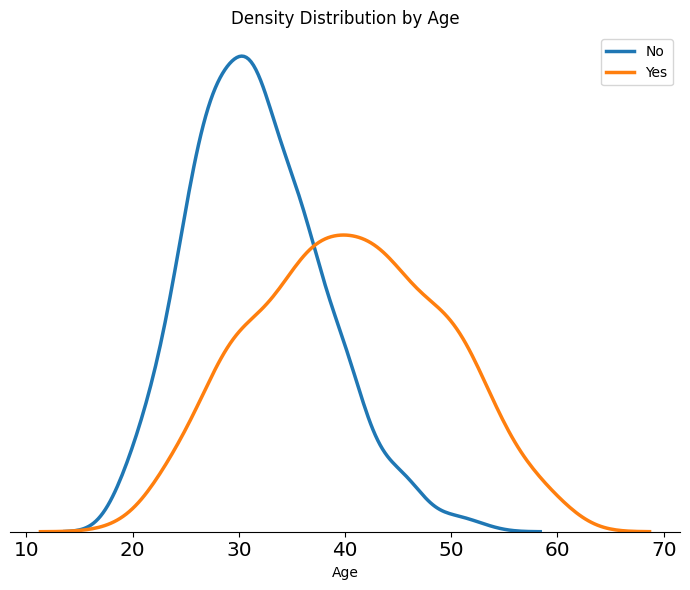

In [ ]:
plt.figure(figsize=(7,6))

sns.kdeplot(df_not_clicked['Age'],label='No')
sns.kdeplot(df_clicked['Age'],label='Yes')

plt.title('Density Distribution by Age')
plt.legend()
plt.yticks(visible=False)
plt.ylabel('')
# no spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.tight_layout()
plt.show()

## Data Reduction

In [ ]:
to_drop = ['city', 'province', 'category', 'Timestamp']

In [ ]:
reduced_df = df.copy()
reduced_df.drop(to_drop, axis=1, inplace=True)

# Data Splitting

In [ ]:
y = reduced_df['Clicked on Ad']
x = reduced_df.drop('Clicked on Ad', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  792 non-null    float64 
 1   Age                       800 non-null    int64   
 2   Area Income               791 non-null    float64 
 3   Daily Internet Usage      792 non-null    float64 
 4   Male                      798 non-null    object  
 5   Weekday                   800 non-null    int32   
 6   TimeBucket                800 non-null    category
dtypes: category(1), float64(3), int32(1), int64(1), object(1)
memory usage: 41.6+ KB


## Advanced Features Grouping

In [ ]:
cat_cols_2 = []

for col in x_train.columns:
  if col in cat_cols or col in binary_cols:
    cat_cols_2.append(col)

num_cols_2 = []

for col in x_train.columns:
  if col in num_cols:
    num_cols_2.append(col)

In [ ]:
cat_cols_2

['Male', 'TimeBucket']

In [ ]:
num_cols_2

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Weekday']

# Data Preprocessing

## Missing Values

In [ ]:
x_train.isna().sum()

,0
Daily Time Spent on Site,8
Age,0
Area Income,9
Daily Internet Usage,8
Male,2
Weekday,0
TimeBucket,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

In [ ]:
x_train[cat_cols_2] = cat_imputer.fit_transform(x_train[cat_cols_2])
x_train[num_cols_2] = num_imputer.fit_transform(x_train[num_cols_2])

x_test[cat_cols_2] = cat_imputer.transform(x_test[cat_cols_2])
x_test[num_cols_2] = num_imputer.transform(x_test[num_cols_2])

# x_val[cat_cols_2] = cat_imputer.transform(x_val[cat_cols_2])
# x_val[num_cols_2] = num_imputer.transform(x_val[num_cols_2])

## Duplicates

In [ ]:
x_train.duplicated().sum()

np.int64(0)

## Data Encoding

In [ ]:
x_train['Male'] = x_train['Male'].apply(lambda x: 1 if x == 'Laki-Laki' else 0)
x_test['Male'] = x_test['Male'].apply(lambda x: 1 if x == 'Laki-Laki' else 0)
# x_val['Male'] = x_val['Male'].apply(lambda x: 1 if x == 'Laki-Laki' else 0)

In [ ]:
y_train = y_train.apply(lambda x: 1 if x == 'Yes' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'Yes' else 0)
# y_val = y_val.apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
y_train

,Clicked on Ad
29,0
535,0
695,0
557,0
836,1
...,...
106,0
270,1
860,1
435,1


## Rescaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [ ]:
# rescale num
x_train[num_cols_2] = scaler.fit_transform(x_train[num_cols_2])
x_test[num_cols_2] = scaler.transform(x_test[num_cols_2])
# x_val[num_cols_2] = scaler.transform(x_val[num_cols_2])

In [ ]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Weekday,TimeBucket
29,0.267813,-1.000000,-0.614892,0.288241,0,-0.25,3
535,0.368060,-0.230769,0.741170,0.265500,1,-0.25,2
695,0.175249,0.230769,0.577280,0.722971,0,0.75,2
557,0.401354,-0.538462,0.090434,0.502637,0,-0.25,1
836,-0.713071,0.846154,-0.442692,-0.902119,0,0.75,1


## Data Balancing

In [ ]:
y_train.value_counts()

,count
Clicked on Ad,
0,411
1,389


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

,count
Clicked on Ad,
0,411
1,411


# Model Development & Evaluation

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    'logreg': LogisticRegression(random_state=42),
    'dt': DecisionTreeClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'nb': GaussianNB(),
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'ada': AdaBoostClassifier(random_state=42),
    'xgb': XGBClassifier(random_state=42),
    'cat': CatBoostClassifier(verbose=0, random_state=42)
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def evaluate_models(x_train, x_test, y_train, y_test, models, n_iter=20, random_state=42):
    eval_results = []
    best_model_pipeline = None
    best_f1_global = -1
    all_trained_models = {}

    # Identify categorical columns for one-hot encoding
    categorical_features = x_train.select_dtypes(include=['category']).columns
    numerical_features = x_train.select_dtypes(include=np.number).columns

    # Create a ColumnTransformer to apply one-hot encoding to categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep other columns (like 'Male') as they are
    )


    # Hyperparameter search spaces (continuous/discrete)
    param_distributions = {
        'logreg': {
            'classifier__C': uniform(0.001, 100),
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs']
        },
        'dt': {
            'classifier__max_depth': randint(2, 20),
            'classifier__min_samples_split': randint(2, 10)
        },
        'knn': {
            'classifier__n_neighbors': randint(3, 15),
            'classifier__weights': ['uniform', 'distance']
        },
        'nb': {},  # No tunable params
        'rf': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__max_depth': randint(3, 20),
            'classifier__min_samples_split': randint(2, 10)
        },
        'gb': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__max_depth': randint(2, 10)
        },
        'ada': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 0.3)
        },
        'xgb': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__max_depth': randint(3, 10),
            'classifier__subsample': uniform(0.6, 0.4),
            'classifier__colsample_bytree': uniform(0.6, 0.4)
        },
        'cat': {
            'classifier__iterations': randint(100, 500),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__depth': randint(3, 10),
            'classifier__l2_leaf_reg': uniform(1, 10)
        }
    }

    # Loop through models
    for model_name, model in models.items():
        pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model)])

        # Apply RandomizedSearchCV if hyperparams exist
        if model_name in param_distributions and param_distributions[model_name]:
            search = RandomizedSearchCV(
                pipe,
                param_distributions[model_name],
                n_iter=n_iter,
                scoring='f1',
                cv=5,
                n_jobs=-1,
                random_state=random_state
            )
            search.fit(x_train, y_train)
            classifier = search.best_estimator_
        else:
            pipe.fit(x_train, y_train)
            classifier = pipe

        # Predict probabilities
        if hasattr(classifier.named_steps['classifier'], 'predict_proba'):
            y_proba = classifier.predict_proba(x_test)[:, 1]

            # Threshold tuning
            thresholds = np.arange(0.1, 0.9, 0.01)
            f1_scores = [f1_score(y_test, y_proba > t, zero_division=0) for t in thresholds]
            best_idx = np.argmax(f1_scores)
            best_threshold = thresholds[best_idx]
            best_f1 = f1_score(y_test, y_proba > best_threshold, zero_division=0)
            y_pred = (y_proba > best_threshold).astype(int)
        else:
            y_proba = None
            y_pred = classifier.predict(x_test)
            best_threshold = None
            best_f1 = f1_score(y_test, y_pred, zero_division=0)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        # Save best model pipeline
        if best_f1 > best_f1_global:
            best_f1_global = best_f1
            best_model_pipeline = classifier

        all_trained_models[model_name] = {
            'pipeline': classifier,
            'best_threshold': best_threshold
        }

        eval_results.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': best_f1,
            'ROC AUC': roc,
            'Best Threshold': best_threshold
        })

    # Results DataFrame
    results_df = pd.DataFrame(eval_results)
    results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
    return results_df, best_model_pipeline

In [ ]:
results_df, best_model_pipeline = evaluate_models(x_train, x_test, y_train, y_test, models)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Best Threshold
0,logreg,0.960,0.972477,0.954955,0.963636,0.980565,0.53
1,nb,0.955,0.947368,0.972973,0.960000,0.981577,0.39
2,xgb,0.945,0.946429,0.954955,0.950673,0.978237,0.34
3,rf,0.945,0.962963,0.936937,0.949772,0.982184,0.60
4,cat,0.940,0.930435,0.963964,0.946903,0.979046,0.10
5,gb,0.940,0.938053,0.954955,0.946429,0.979148,0.10
6,knn,0.935,0.929825,0.954955,0.942222,0.974390,0.33
7,ada,0.930,0.921739,0.954955,0.938053,0.978692,0.47
8,dt,0.920,0.927928,0.927928,0.927928,0.916844,0.34


In [ ]:
best_model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Weekday'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=np.float64(2.0594494295802446),
                                    random_state=42))])

# Model Impact Analysis

In [ ]:
y_pred = best_model_pipeline.predict(x_test)

In [ ]:
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        89
           1       0.96      0.96      0.96       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,84,5
Actual Positive,4,107


# Model Explainability Analysis

In [ ]:
feature_names = x_train.columns

In [ ]:
coeffs = best_model_pipeline.named_steps['classifier'].coef_[0]
intercept = best_model_pipeline.named_steps['classifier'].intercept_[0]

# Show in a table
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs,
}).sort_values(by='Coefficient', ascending=False)

coef_table

,Feature,Coefficient
1,Age,1.673613
5,Weekday,0.588148
6,TimeBucket,-0.039832
4,Male,-0.528487
2,Area Income,-2.029972
0,Daily Time Spent on Site,-4.072866
3,Daily Internet Usage,-4.551744


In [ ]:
df[(df['Weekday'] == 3)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Weekday,TimeBucket
5,59.99,23,418330920.0,226.74,Laki-Laki,2016-05-19 14:30:00,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel,3,3
6,88.91,33,376969950.0,208.36,Perempuan,2016-01-28 20:59:00,No,Bandung,Jawa Barat,Electronic,3,4
14,42.95,33,216832000.0,143.56,Perempuan,2016-03-24 09:31:00,Yes,Padang,Sumatra Barat,Food,3,2
28,70.20,34,228962580.0,119.20,Perempuan,2016-04-14 05:08:00,Yes,Pontianak,Kalimantan Barat,House,3,1
33,55.60,23,211595860.0,212.58,Perempuan,2016-01-14 14:00:00,Yes,Pontianak,Kalimantan Barat,Food,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
985,72.88,44,448078820.0,125.12,Perempuan,2016-04-21 19:56:00,Yes,Palembang,Sumatra Selatan,Fashion,3,4
991,38.96,38,255480540.0,NaN,Laki-Laki,2016-07-21 16:02:00,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Travel,3,3
993,64.20,27,463406720.0,227.63,Laki-Laki,2016-02-11 23:45:00,No,Makassar,Sulawesi Selatan,Bank,3,4
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,3,4
